In [12]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random

from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid


import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp


from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing

import seaborn as sns
import feature_finder_keiko as ff
import feature_finder1 as ff1
from statsmodels.tsa.stattools import adfuller

plt.rcParams["figure.figsize"] = (20,10)

from scipy import stats

# ET

In [101]:
f = 12
test_start = 2011
test_end = 2015
n_components_sst = 57
n_components_soil = 40
N = 303

In [102]:
base = []
pcmci = []
corr = []
pcmci_soil = []
corr_soil = []
corr_soil_1 = []
pcmci_cluster = []
pcmci_hybrid = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/ET_orac/pcmci/base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    pcmci.append(np.load("../../whole_data_results/ET_orac/pcmci/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    corr.append(np.load("../../whole_data_results/ET_orac/corr/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    pcmci_soil.append(np.load("../../whole_data_results/ET_orac/pcmci_soil/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_soil)))
    corr_soil.append(np.load("../../whole_data_results/ET_orac/corr_soil/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_soil)))
    corr_soil_1.append(np.load("../../whole_data_results/ET_orac/corr_soil/model_{}_{}_{}_{}_{}_1.npy".format(f,test_start,test_end,tau,n_components_soil)))
    pcmci_cluster.append(np.load("../../whole_data_results/ET_orac/pcmci_cluster/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    #enso.append(np.load("../../whole_data_results/ET_orac/enso/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    #pcmci_hybrid.append(np.load("../../whole_data_results/ET_orac/pcmci_hybrid/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))

In [103]:
base = np.sqrt(base)/N
pcmci = np.sqrt(pcmci)/N
pcmci_soil = np.sqrt(pcmci_soil)/N
corr_soil = np.sqrt(corr_soil)/N
corr_soil_1 = np.sqrt(corr_soil_1)/N
pcmci_cluster = np.sqrt(pcmci_cluster)/N
corr = np.sqrt(corr)/N
pcmci_hybrid = np.sqrt(pcmci_hybrid)/N
#enso = np.sqrt(enso)/N

In [7]:
enso = [0.03033597232940087,
 0.05591597284534927,
 0.08590425553771264,
 0.11364887303366765,
 0.1401371430091104,
 0.15995170437835393,
 0.17500366638311618,
 0.17936686618314338,
 0.18522468711415732,
 0.18625598777438906,
 0.18629406954822164,
 0.18502910758713526]

Text(0.5, 1.0, 'Ethiopia')

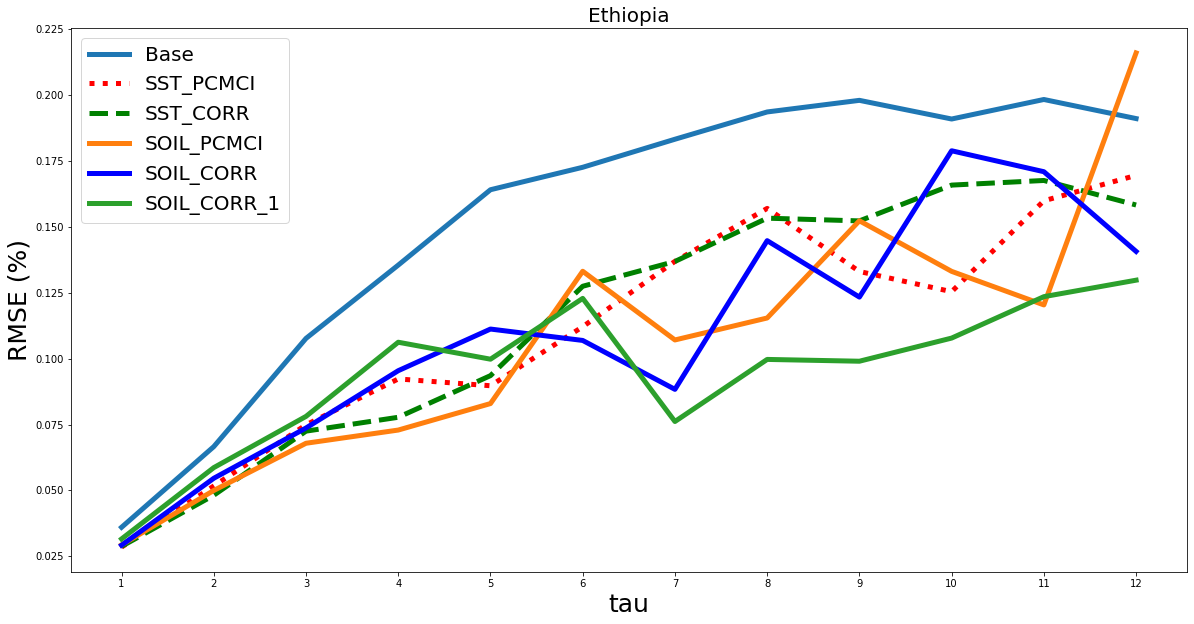

In [104]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'SST_PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'SST_CORR', linewidth=5, linestyle="dashed", color ='green')
#plt.plot(tau, enso, label = 'ENSO', linewidth=5)
plt.plot(tau, pcmci_soil, label = 'SOIL_PCMCI', linewidth=5)
plt.plot(tau, corr_soil, label = 'SOIL_CORR', linewidth=5,color ='blue')
plt.plot(tau, corr_soil_1, label = 'SOIL_CORR_1', linewidth=5)
#plt.plot(tau, pcmci_cluster, label = 'PCMCI_CLUSTER', linewidth=5)
#plt.plot(tau, pcmci_hybrid, label = 'PCMCI_HYBRID', linewidth=5)
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("Ethiopia", fontsize = 20)
#plt.savefig("ET.png")

In [338]:
corr_soil = []
#pcmci_soil_1 = []
base = []
n_components_soil = 40
f = 12
step = 1
test_start = 1983
test_end = 2015
N = 303
for tau in range(1,13,1):
    base.append(np.nanmean(np.load("../../whole_data_results/ET_orac/corr_soil/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))))
    corr_soil.append(np.nanmean(np.load("../../whole_data_results/ET_orac/corr_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))))
    #pcmci_soil_1.append(np.nanmean(np.load("../../whole_data_results/ET_orac/pcmci_soil/model_{}_{}_{}_{}_{}_{}_1.npy".format(f,step,test_start,test_end,tau,n_components_soil))))
    


In [339]:
base = np.sqrt(base)/N
corr_soil = np.sqrt(corr_soil)/N
#pcmci_soil_1 = np.sqrt(pcmci_soil_1)/N

Text(0.5, 1.0, 'Ethiopia')

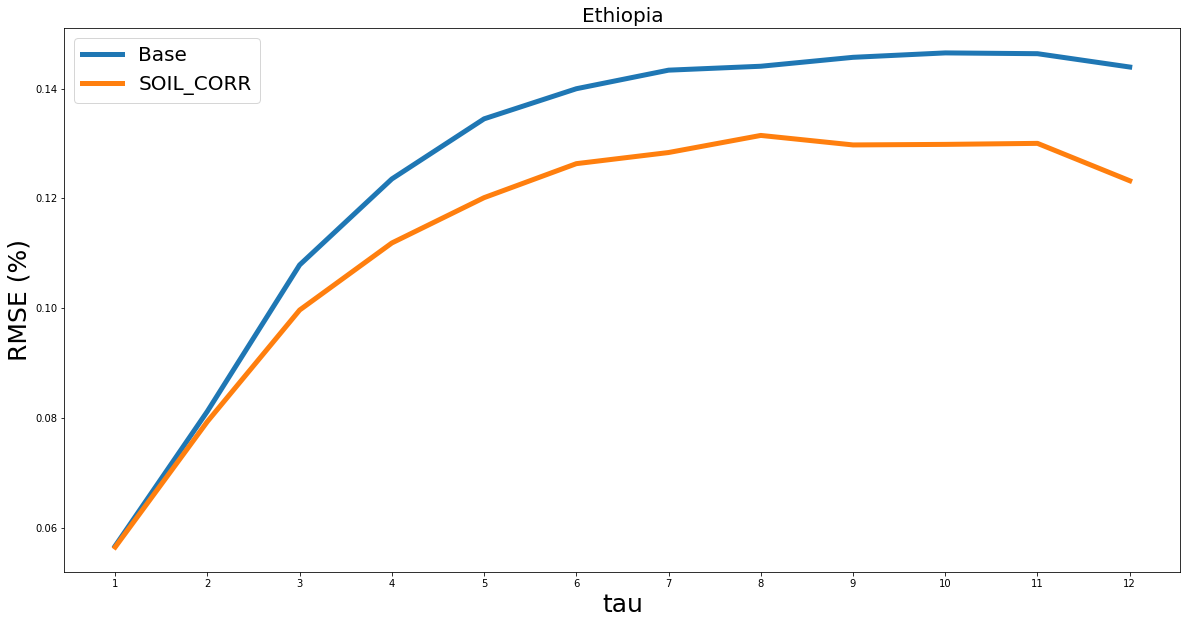

In [292]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
#plt.plot(tau, pcmci_soil, label = 'SOIL_PCMCI_1', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr_soil, label = 'SOIL_CORR', linewidth=5)
#plt.plot(tau, pcmci_cluster, label = 'PCMCI_CLUSTER', linewidth=5)
#plt.plot(tau, pcmci_hybrid, label = 'PCMCI_HYBRID', linewidth=5)
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("Ethiopia", fontsize = 20)
#plt.savefig("ET.png")

In [17]:
corr = []
pcmci = []
base = []
n_components_soil = 40
f = 12
for tau in range(1,13,1):
    base.append(np.load("../../whole_data_results/ET_orac/pcmci_soil/base_{}_{}_{}_1.npy".format(f,tau,n_components_soil)))
    corr.append(np.load("../../whole_data_results/ET_orac/corr_soil/model_{}_{}_{}_1.npy".format(f,tau,n_components_soil)))
    pcmci.append(np.load("../../whole_data_results/ET_orac/pcmci_soil/model_{}_{}_{}_1.npy".format(f,tau,n_components_soil)))

In [34]:
corr = np.array(corr)
pcmci = np.array(pcmci)

In [24]:
np.std(corr[7,:])

647.9383874277364

In [33]:
np.std(corr[11,:])

325.31569017748376

In [37]:
np.std(pcmci[10,:])

493.01062490600634

In [64]:
class_name = "Aw"
base = []
pcmci = []
corr = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/ET_orac/pcmci/base_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))
    pcmci.append(np.load("../../whole_data_results/ET_orac/pcmci/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))
    corr.append(np.load("../../whole_data_results/ET_orac/corr/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))

base = np.sqrt(base)/117
pcmci = np.sqrt(pcmci)/117
corr = np.sqrt(corr)/117

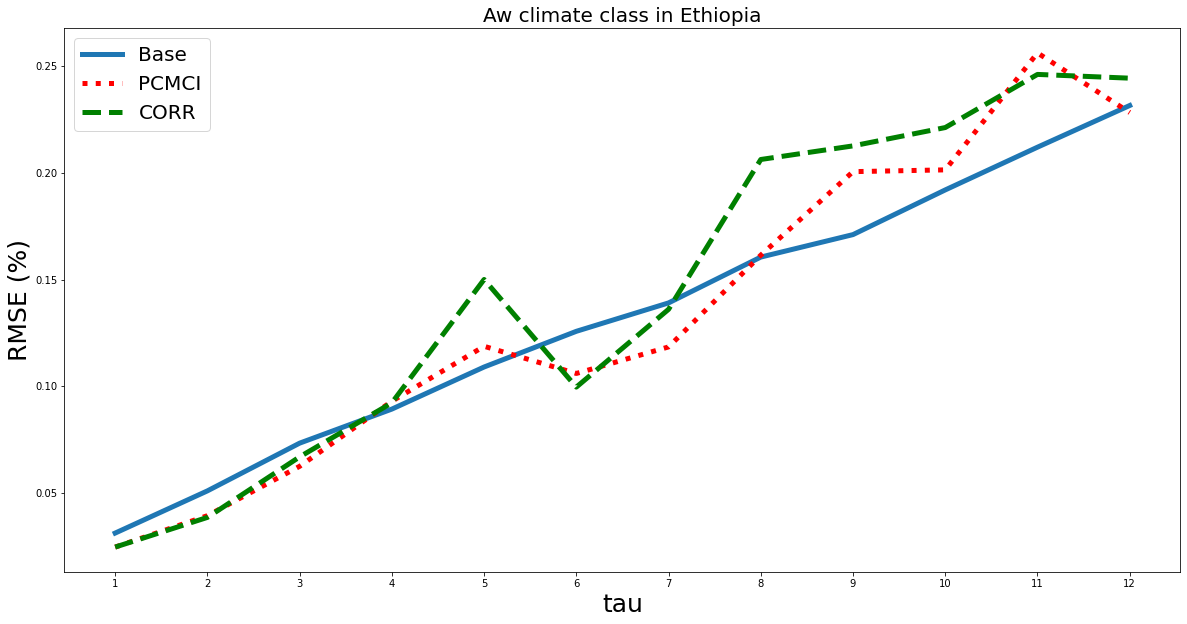

In [65]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color = 'green')
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE (SPI)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("Aw climate class in Ethiopia", fontsize = 20)
plt.savefig("./results/ET_Aw.png")

In [66]:
class_name = "BSh"
base = []
pcmci = []
corr = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/ET_orac/pcmci/base_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))
    pcmci.append(np.load("../../whole_data_results/ET_orac/pcmci/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))
    corr.append(np.load("../../whole_data_results/ET_orac/corr/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))

base = np.sqrt(base)/81
pcmci = np.sqrt(pcmci)/81
corr = np.sqrt(corr)/81

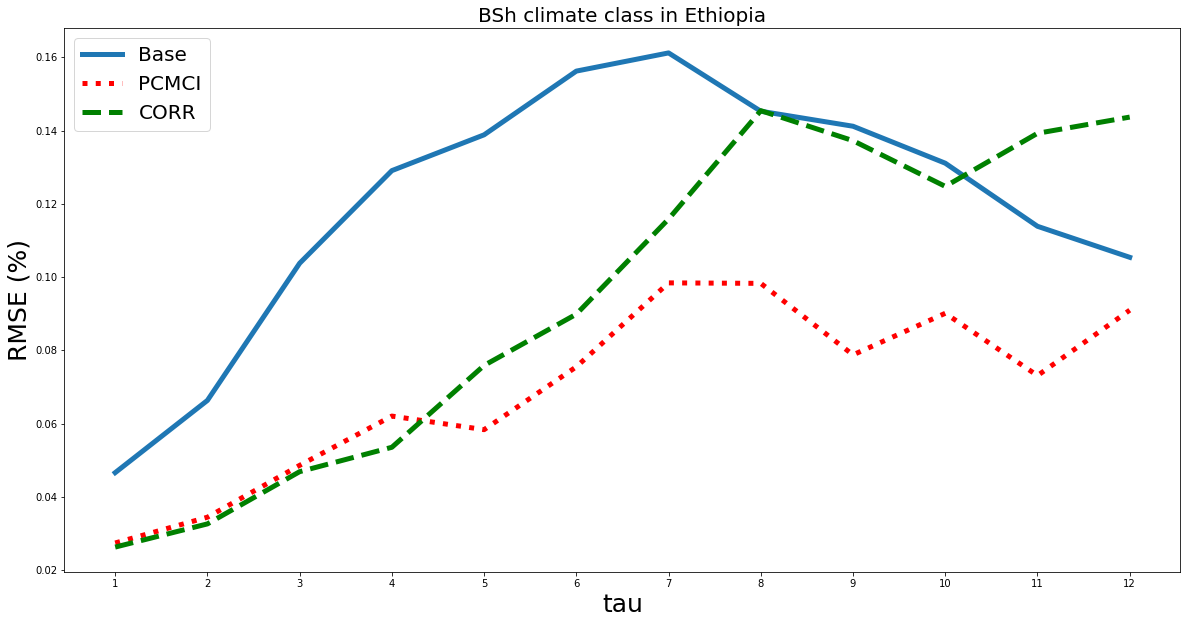

In [67]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color = 'green')
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("V Options.png")
plt.title("BSh climate class in Ethiopia", fontsize = 20)
plt.savefig("./results/ET_BSh.png")

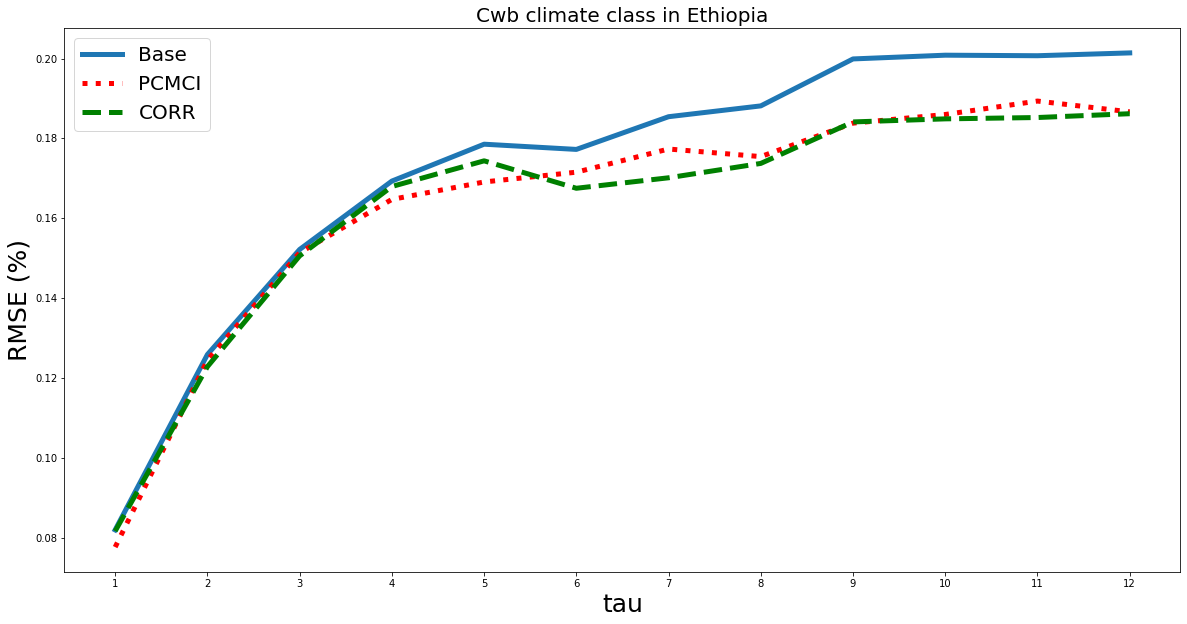

In [68]:
class_name = "Cwb"
N = 63
base = []
pcmci = []
corr = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/ET_orac/pcmci/base_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))
    pcmci.append(np.load("../../whole_data_results/ET_orac/pcmci/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))
    corr.append(np.load("../../whole_data_results/ET_orac/corr/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))

base = np.sqrt(base)/N
pcmci = np.sqrt(pcmci)/N
corr = np.sqrt(corr)/N

tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color = 'green')
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("V Options.png")
plt.title("Cwb climate class in Ethiopia", fontsize = 20)
plt.savefig("./results/ET_Cwb.png")

In [93]:
f = 12
test_start = 2011
test_end = 2015
n_components_sst = 57
index = 300

In [94]:
base = []
pcmci = []
corr = []
#enso = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/ET_orac/pcmci_spi/base_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,index)))
    pcmci.append(np.load("../../whole_data_results/ET_orac/pcmci_spi/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,index)))
    #corr.append(np.load("../../whole_data_results/ET_orac/corr_spi/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,index)))
    #enso.append(np.load("../../whole_data_results/ET_orac/enso/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))


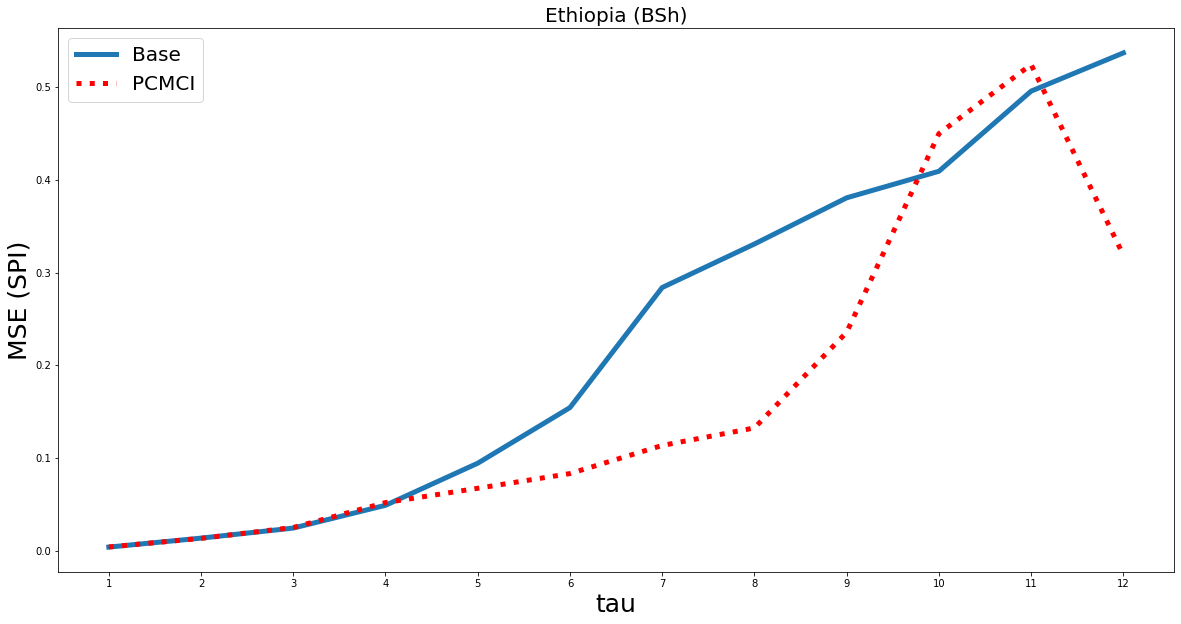

In [96]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
#plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color ='green')
#plt.plot(tau, enso, label = 'ENSO', linewidth=5)
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE (SPI)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("Ethiopia (BSh)", fontsize = 20)
plt.savefig("ET_BSh.png")

In [21]:
tau = 1
pred = np.load("../../whole_data_results/ET_orac/pcmci_data_spi/pred_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,index))
test = np.load("../../whole_data_results/ET_orac/pcmci_data_spi/test_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,index))
base = np.load("../../whole_data_results/ET_orac/pcmci_data_spi/pred_base_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,index))

In [22]:
test

array([ 0.85066101,  0.84368448,  0.84982882,  0.87803705,  0.72299458,
        0.65997408,  0.67272554,  0.73627721,  0.8496294 ,  1.08838257,
        1.12534465,  0.74097328,  0.61806902,  0.61580585,  0.60891797,
        0.92146296,  1.05569195,  1.13306555,  1.16318574,  1.06130617,
        0.88862129,  0.56681919, -0.20057316,  1.15782827,  1.15840177,
        1.15901604,  1.15965366,  0.83413171,  0.24165721,  0.54425786,
        0.5381913 ,  0.52313087,  0.47597526,  0.4891962 ,  1.7070772 ,
        0.69904412,  0.68291274,  0.67527839,  0.66862579,  0.66452023,
        0.9729059 ,  1.26073142,  1.28841539,  1.28615013,  1.54514039,
        1.62030533,  0.92932876,  0.91521898])

In [23]:
pred

array([ 0.43471611,  0.60393792,  0.61585041,  0.61312422,  0.99811236,
        0.50674542,  0.35806506,  0.36539348,  0.44445707,  0.57287293,
        1.08041595,  0.97536726,  0.47359402,  0.32350682,  0.28321177,
        0.28321177,  0.90260874,  0.97475125,  1.00025605,  1.01527347,
        0.9770914 ,  0.8849689 ,  0.39153003, -0.22503879,  1.04721218,
        1.1376529 ,  1.12009013,  1.00552659,  0.57066509,  0.26177734,
        0.29702967,  0.28321177,  0.27546357,  0.28464327,  0.30493474,
        1.37378646,  0.49636355,  0.39041839,  0.38100055,  0.322703  ,
        0.31002181,  1.05138808,  1.45321746,  1.43812691,  1.43498141,
        1.46377602,  1.33133005,  1.01045347])

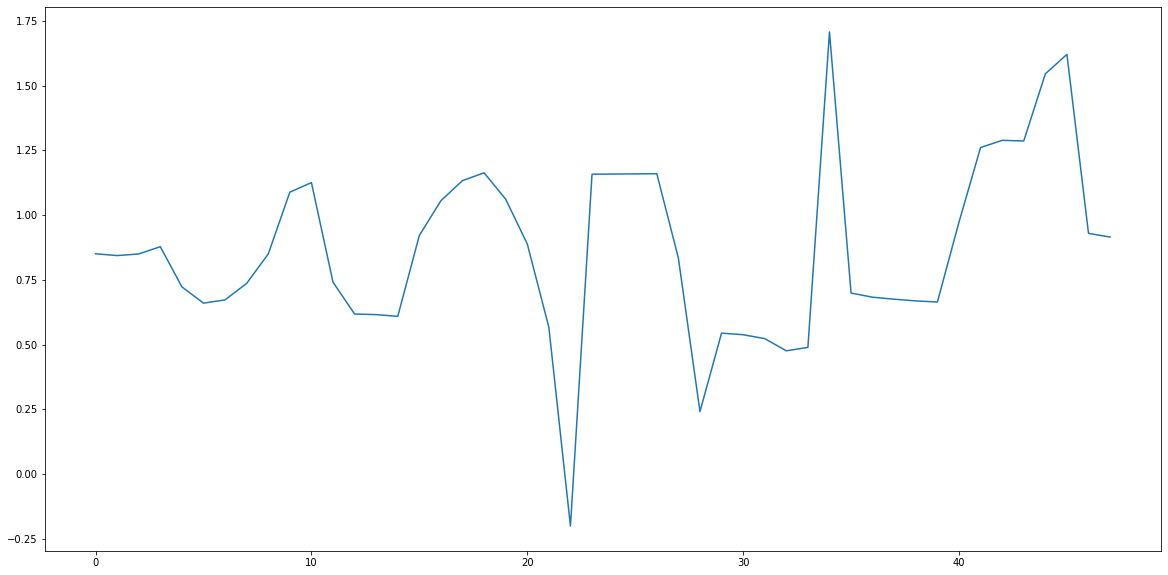

In [24]:
plt.plot(test)

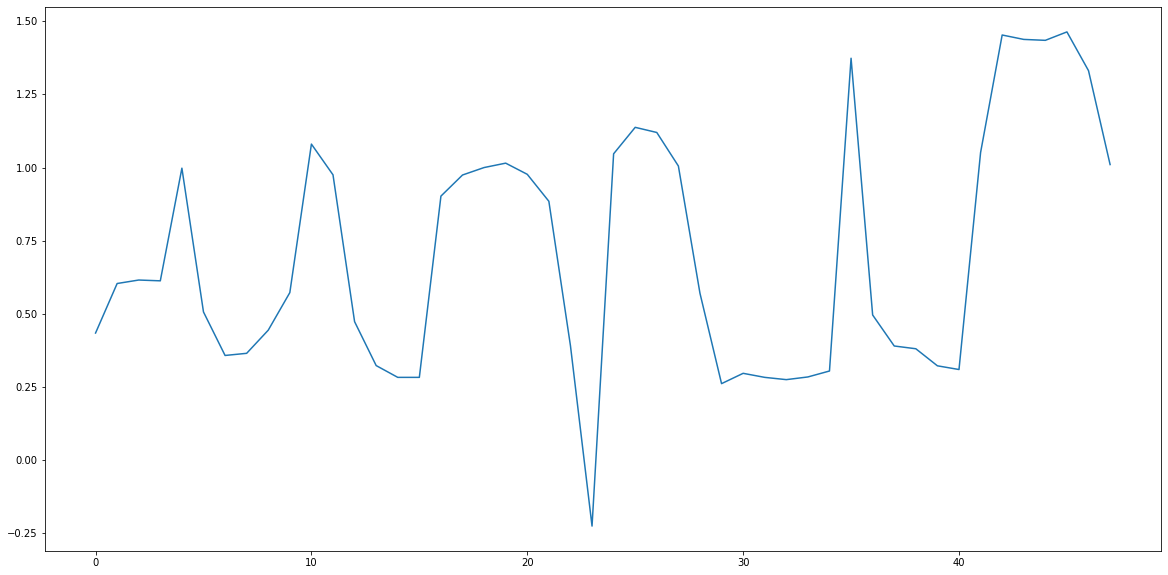

In [25]:
plt.plot(pred)

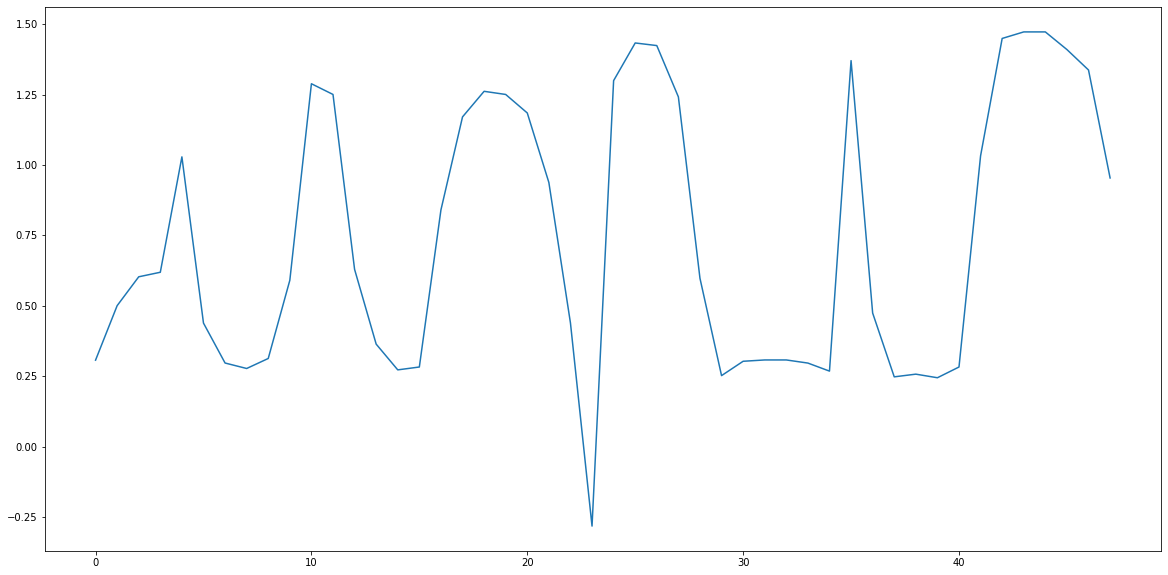

In [26]:
plt.plot(base)

In [19]:
st.pearsonr(pred,test)

(-0.054648547898752925, 0.7277988024983064)

In [20]:
st.pearsonr(base,test)

(0.0682916227139174, 0.6634674509173384)

# Cal

In [126]:
f = 12
test_start = 2011
test_end = 2015
n_components_sst = 57
N = 175
n_components_sst_local = 8

In [127]:
base = []
pcmci = []
pcmci_local = []
corr_local = []
corr = []
enso = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/Cal/pcmci/base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    pcmci.append(np.load("../../whole_data_results/Cal/pcmci/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    corr.append(np.load("../../whole_data_results/Cal/corr/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    pcmci_local.append(np.load("../../whole_data_results/Cal/pcmci_local/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst_local)))
    corr_local.append(np.load("../../whole_data_results/Cal/corr_local/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst_local)))
    enso.append(np.load("../../whole_data_results/Cal/enso/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
base = np.sqrt(base)/N
pcmci = np.sqrt(pcmci)/N
pcmci_local = np.sqrt(pcmci_local)/N
corr = np.sqrt(corr)/N
corr_local = np.sqrt(corr_local)/N
enso = np.sqrt(enso)/N


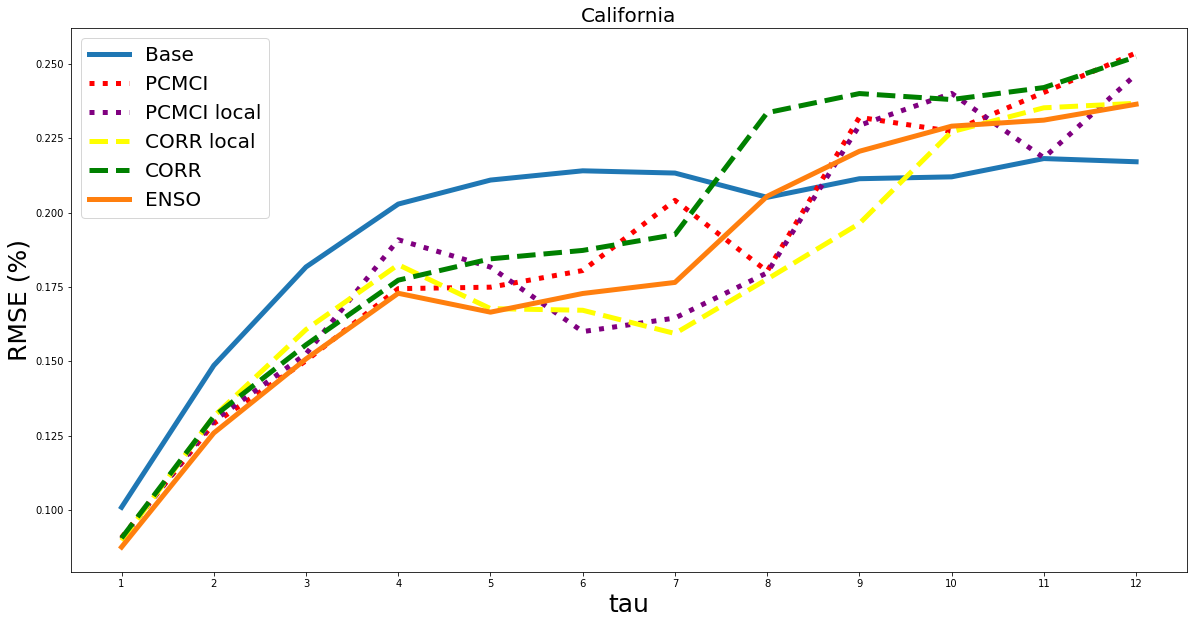

In [128]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, pcmci_local, label = 'PCMCI local', linewidth=5, linestyle="dotted", color = 'purple')
plt.plot(tau, corr_local, label = 'CORR local', linewidth=5, linestyle="dashed", color='yellow')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color='green')
plt.plot(tau, enso, label = 'ENSO', linewidth=5)
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("California", fontsize = 20)
plt.savefig("./results/Cal.png")

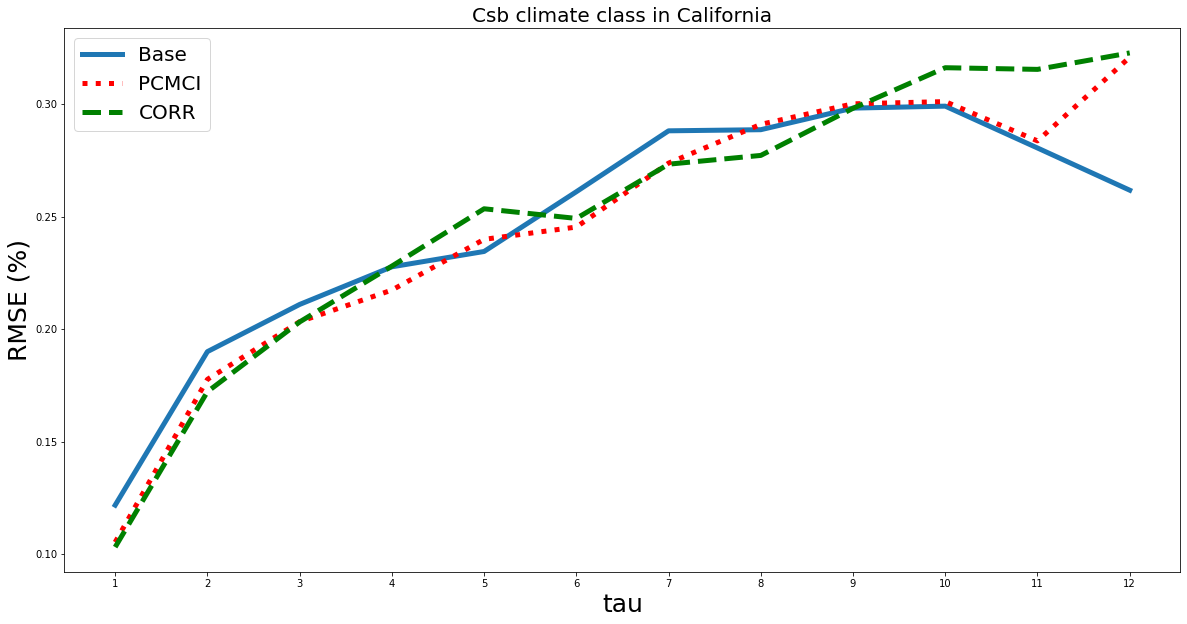

In [82]:
class_name = "Csb"
N = 88
base = []
pcmci = []
corr = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/Cal/pcmci/base_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))
    pcmci.append(np.load("../../whole_data_results/Cal/pcmci/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))
    corr.append(np.load("../../whole_data_results/Cal/corr/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))

base = np.sqrt(base)/N
pcmci = np.sqrt(pcmci)/N
corr = np.sqrt(corr)/N

tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color = 'green')
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("Csb climate class in California", fontsize = 20)
plt.savefig("./results/Cal_Csb.png")

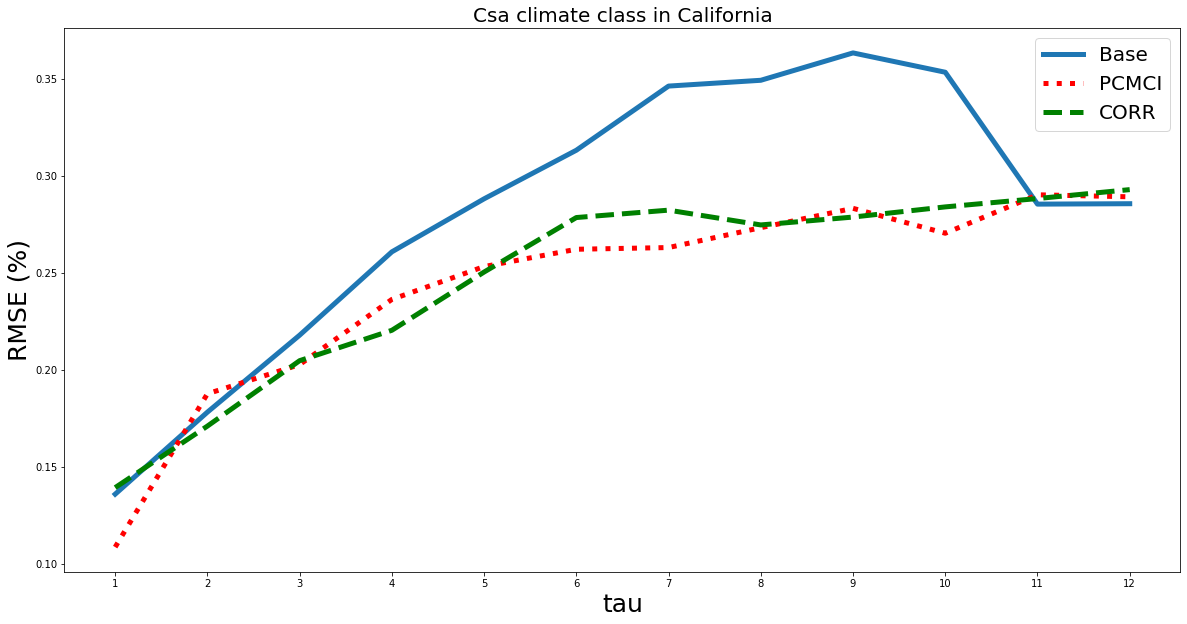

In [85]:
class_name = "Csa"
N = 28
base = []
pcmci = []
corr = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/Cal/pcmci/base_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))
    pcmci.append(np.load("../../whole_data_results/Cal/pcmci/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))
    corr.append(np.load("../../whole_data_results/Cal/corr/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))

base = np.sqrt(base)/N
pcmci = np.sqrt(pcmci)/N
corr = np.sqrt(corr)/N

tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color = 'green')
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("Csa climate class in California", fontsize = 20)
plt.savefig("./results/Cal_Csa.png")

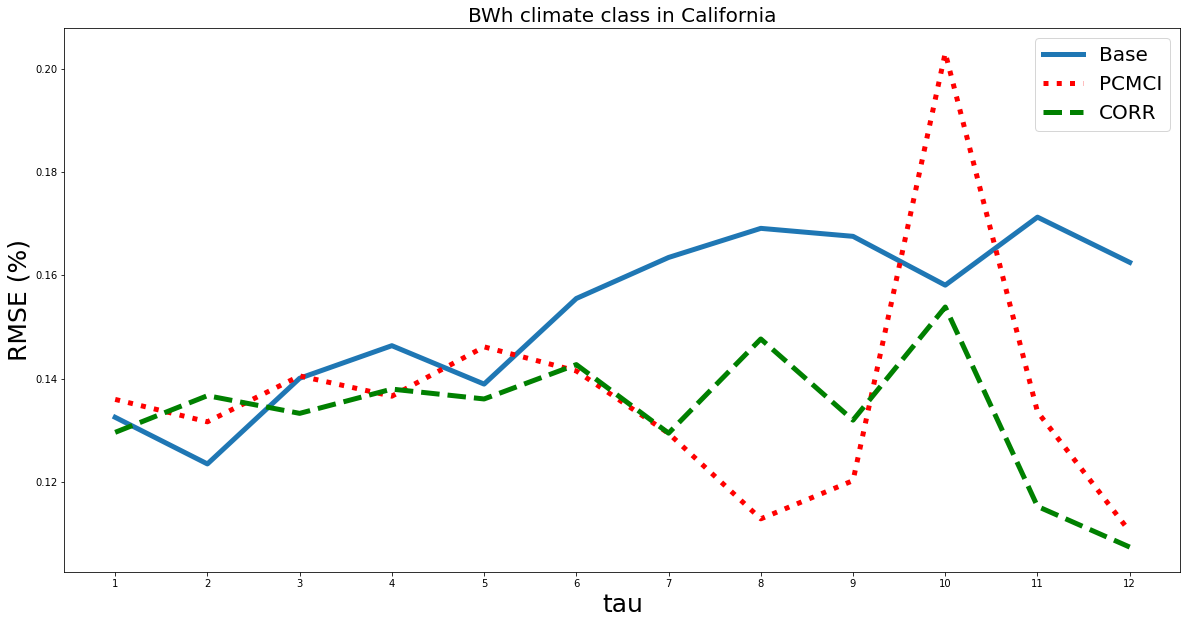

In [87]:
class_name = "BWh"
N = 22
base = []
pcmci = []
corr = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/Cal/pcmci/base_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))
    pcmci.append(np.load("../../whole_data_results/Cal/pcmci/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))
    corr.append(np.load("../../whole_data_results/Cal/corr/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,class_name)))

base = np.sqrt(base)/N
pcmci = np.sqrt(pcmci)/N
corr = np.sqrt(corr)/N

tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color = 'green')
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("BWh climate class in California", fontsize = 20)
plt.savefig("./results/Cal_BWh.png")

# ZA

In [89]:
f = 12
test_start = 2011
test_end = 2015
n_components_sst = 57
N = 475
cc = 'ZA'

In [90]:
base = []
pcmci = []
corr = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/{}/pcmci/base_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst)))
    pcmci.append(np.load("../../whole_data_results/{}/pcmci/model_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst)))
    corr.append(np.load("../../whole_data_results/{}/corr/model_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst)))

base = np.sqrt(base)/N
pcmci = np.sqrt(pcmci)/N
corr = np.sqrt(corr)/N

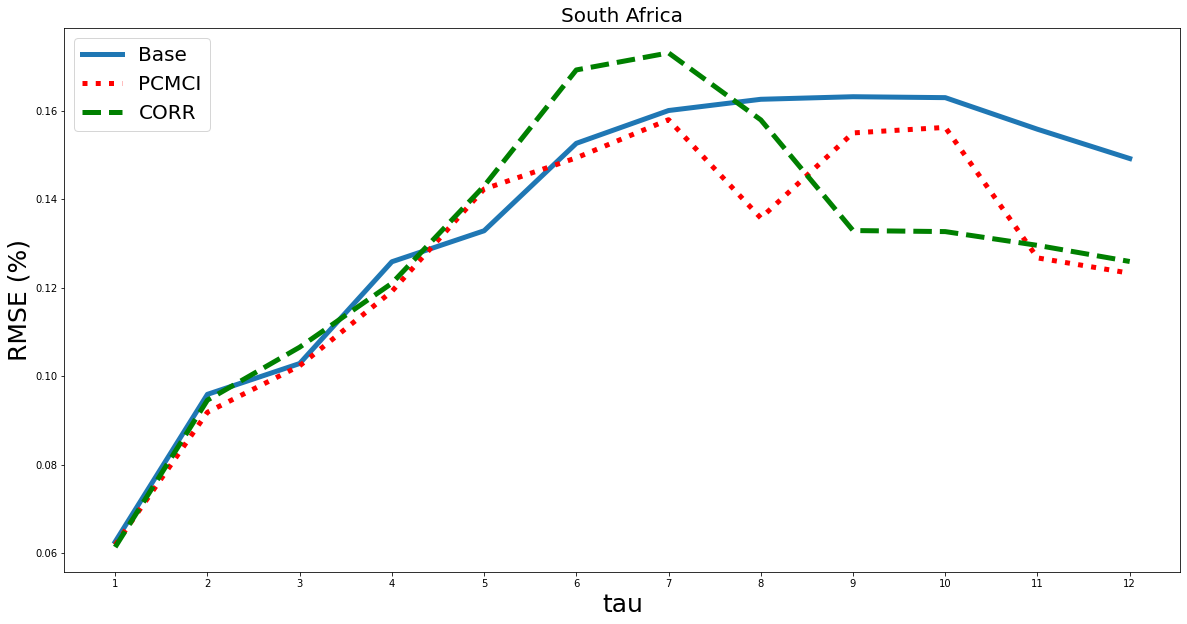

In [91]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color = 'green')
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("South Africa", fontsize = 20)
plt.savefig("./results/ZA.png")

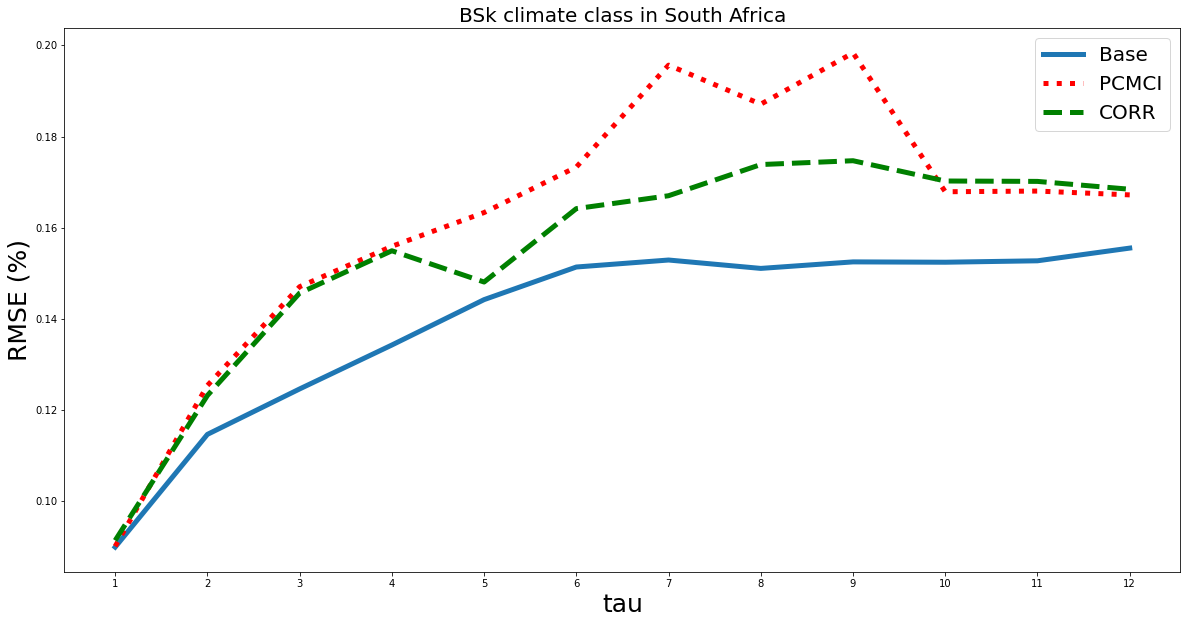

In [92]:
class_name = "BSk"
N = 105
base = []
pcmci = []
corr = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/{}/pcmci/base_{}_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst,class_name)))
    pcmci.append(np.load("../../whole_data_results/{}/pcmci/model_{}_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst,class_name)))
    corr.append(np.load("../../whole_data_results/{}/corr/model_{}_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst,class_name)))

base = np.sqrt(base)/N
pcmci = np.sqrt(pcmci)/N
corr = np.sqrt(corr)/N

tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color = 'green')
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("BSk climate class in South Africa", fontsize = 20)
plt.savefig("./results/ZA_BSk.png")

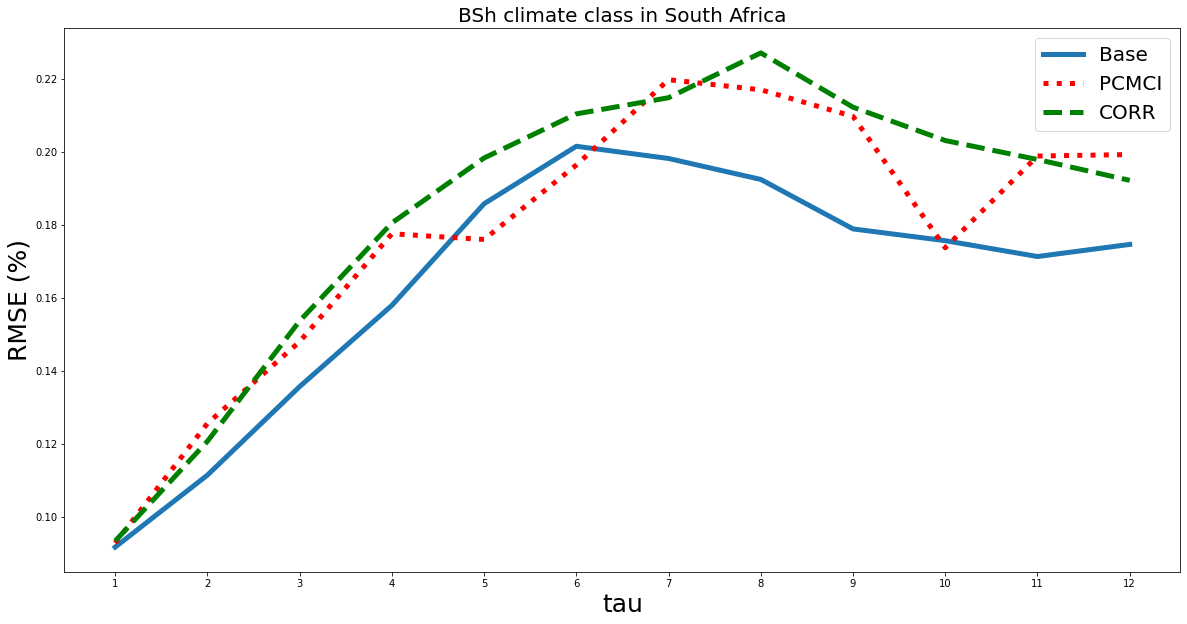

In [93]:
class_name = "BSh"
N = 84
base = []
pcmci = []
corr = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/{}/pcmci/base_{}_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst,class_name)))
    pcmci.append(np.load("../../whole_data_results/{}/pcmci/model_{}_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst,class_name)))
    corr.append(np.load("../../whole_data_results/{}/corr/model_{}_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst,class_name)))

base = np.sqrt(base)/N
pcmci = np.sqrt(pcmci)/N
corr = np.sqrt(corr)/N

tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color = 'green')
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("BSh climate class in South Africa", fontsize = 20)
plt.savefig("./results/ZA_BSh.png")

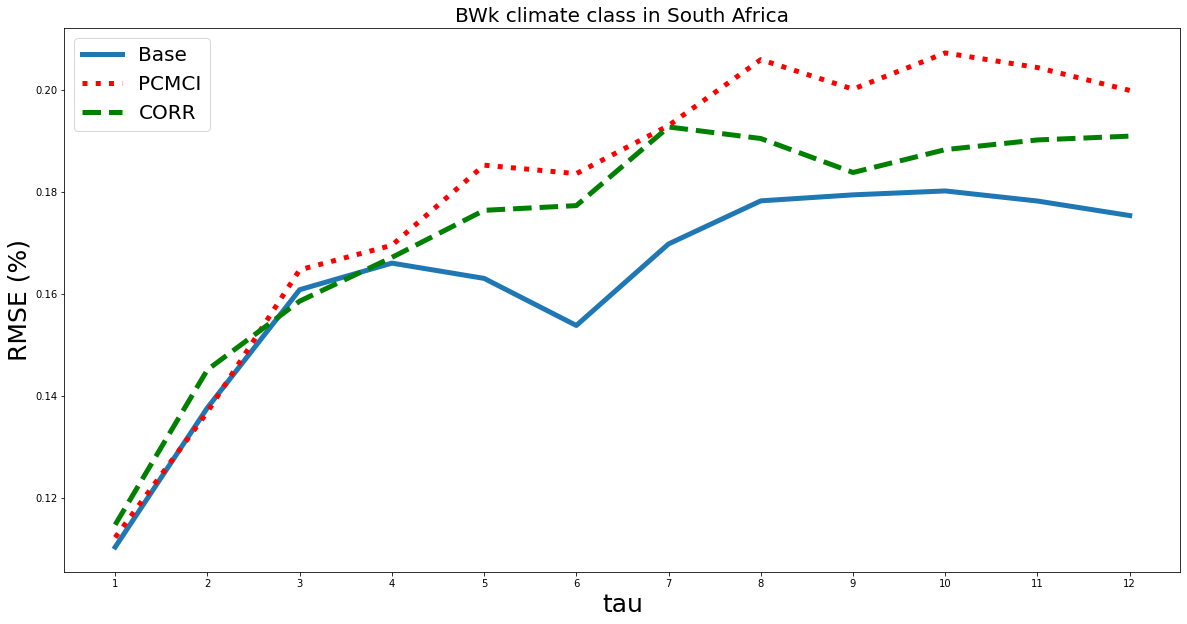

In [96]:
class_name = "BWk"
N = 59
base = []
pcmci = []
corr = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/{}/pcmci/base_{}_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst,class_name)))
    pcmci.append(np.load("../../whole_data_results/{}/pcmci/model_{}_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst,class_name)))
    corr.append(np.load("../../whole_data_results/{}/corr/model_{}_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst,class_name)))

base = np.sqrt(base)/N
pcmci = np.sqrt(pcmci)/N
corr = np.sqrt(corr)/N

tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color = 'green')
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("BWk climate class in South Africa", fontsize = 20)
plt.savefig("./results/ZA_BWk.png")

# ZW

In [13]:
f = 12
test_start = 2011
test_end = 2015
n_components_sst = 57
N = 175

In [15]:
base = []
pcmci = []
corr = []
enso = []
pcmci_cluster = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/ZW/pcmci/base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    pcmci.append(np.load("../../whole_data_results/ZW/pcmci/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    corr.append(np.load("../../whole_data_results/ZW/corr/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    enso.append(np.load("../../whole_data_results/ZW/enso/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    pcmci_cluster.append(np.load("../../whole_data_results/ZW/corr_cluster/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
base = np.sqrt(base)/N
pcmci = np.sqrt(pcmci)/N
corr = np.sqrt(corr)/N
enso = np.sqrt(enso)/N
pcmci_cluster = np.sqrt(pcmci_cluster)/N

Text(0.5, 1.0, 'Zimbabwe')

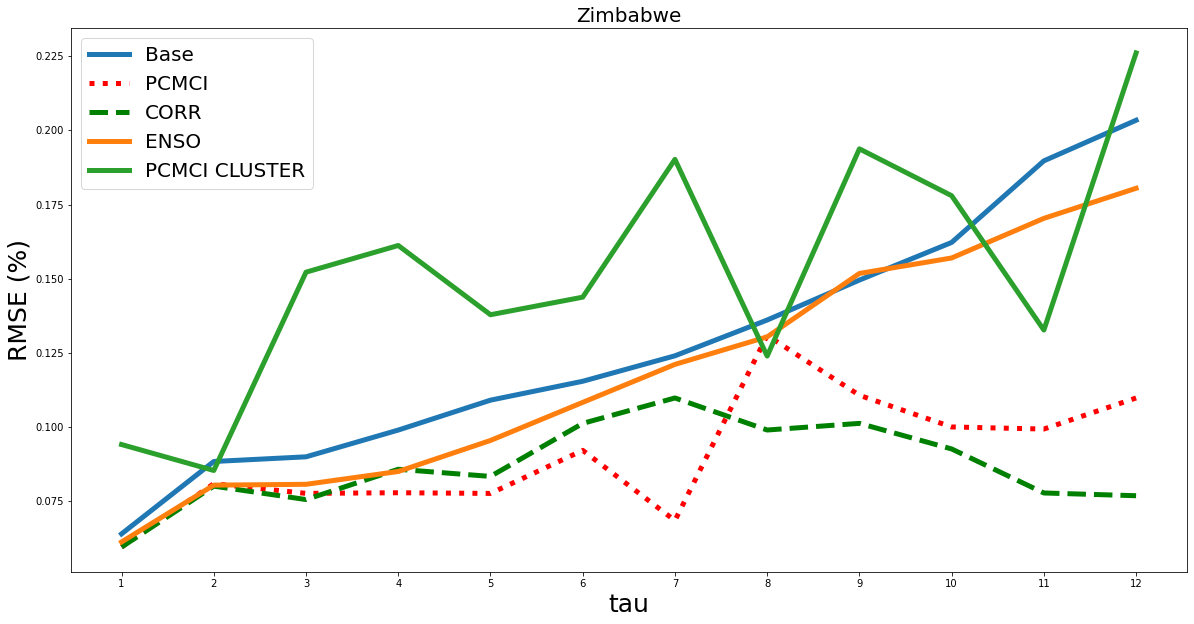

In [16]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color = 'green')
plt.plot(tau, enso, label = 'ENSO', linewidth=5)
plt.plot(tau, pcmci_cluster, label = 'PCMCI CLUSTER', linewidth=5)
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("Zimbabwe", fontsize = 20)
#plt.savefig("./results/ZW.png")

Text(0.5, 1.0, 'Zimbabwe')

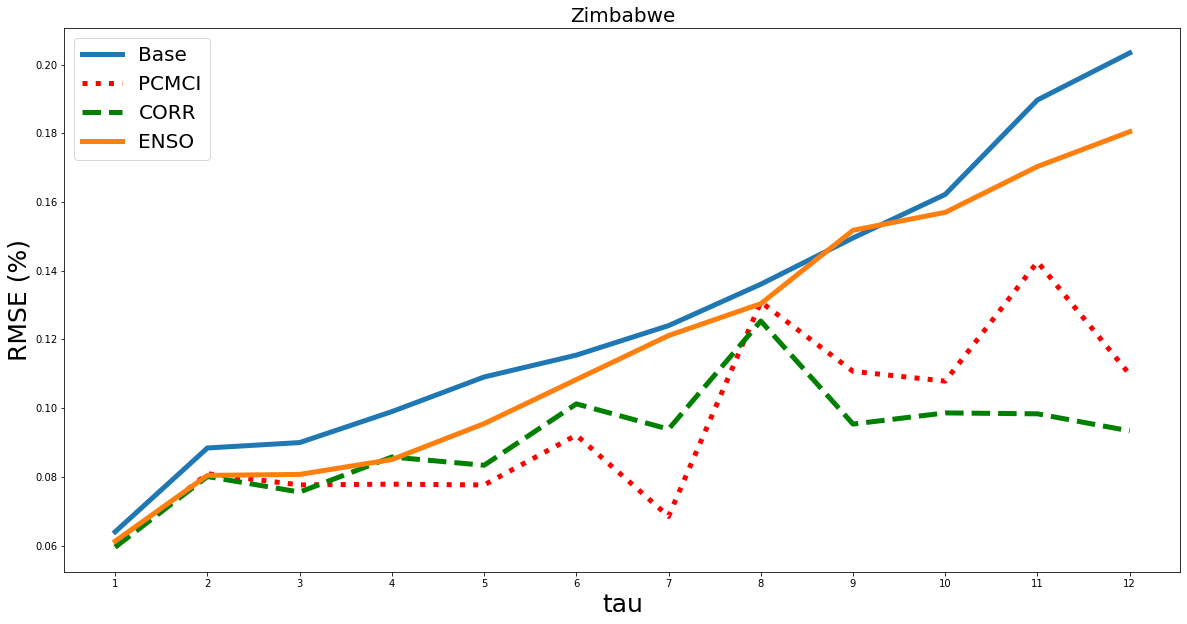

In [38]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color = 'green')
plt.plot(tau, enso, label = 'ENSO', linewidth=5)
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("Zimbabwe", fontsize = 20)
#plt.savefig("./results/ZW.png")

In [179]:
train_start = 1976
train_end = 2010
tau = 11

In [180]:
l = np.load("../../whole_data_results/ZW/link/pcmci_{}_{}_{}_{}_{}.npy".format(f,train_start,train_end,tau,n_components_sst))

In [181]:
l1 = np.load("../../whole_data_results/ZW/link1/pcmci_{}_{}_{}_{}_{}.npy".format(f,train_start,train_end,tau,n_components_sst))

In [182]:
l2 = np.load("../../whole_data_results/ZW/link2/pcmci_{}_{}_{}_{}_{}.npy".format(f,train_start,train_end,tau,n_components_sst))

In [184]:
l1 - l2

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0,

In [145]:
l

array([[ 10, -12],
       [  8, -19],
       [ 26, -20],
       [ 32, -14],
       [ 33, -13],
       [ 25, -12],
       [ 24, -22],
       [  8, -20],
       [ 51, -18],
       [ 39, -22],
       [ 20, -21]])

In [146]:
l1

array([[ 10, -12],
       [  8, -19],
       [ 23, -20],
       [ 15, -18],
       [ 44, -11],
       [ 35, -11],
       [ 25, -19]])

In [37]:
base = []
pcmci = []
#corr = []
#enso = []
for tau in range(1,11):
    base.append(np.load("../../whole_data_results/ZW/pcmci_spi/base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    pcmci.append(np.load("../../whole_data_results/ZW/pcmci_spi/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    #corr.append(np.load("../../whole_data_results/ZW/corr/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    #enso.append(np.load("../../whole_data_results/ZW/enso/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))
    
base = np.sqrt(base)
pcmci = np.sqrt(pcmci)
#corr = np.sqrt(corr)/N
#enso = np.sqrt(enso)/N

Text(0.5, 1.0, 'Zimbabwe')

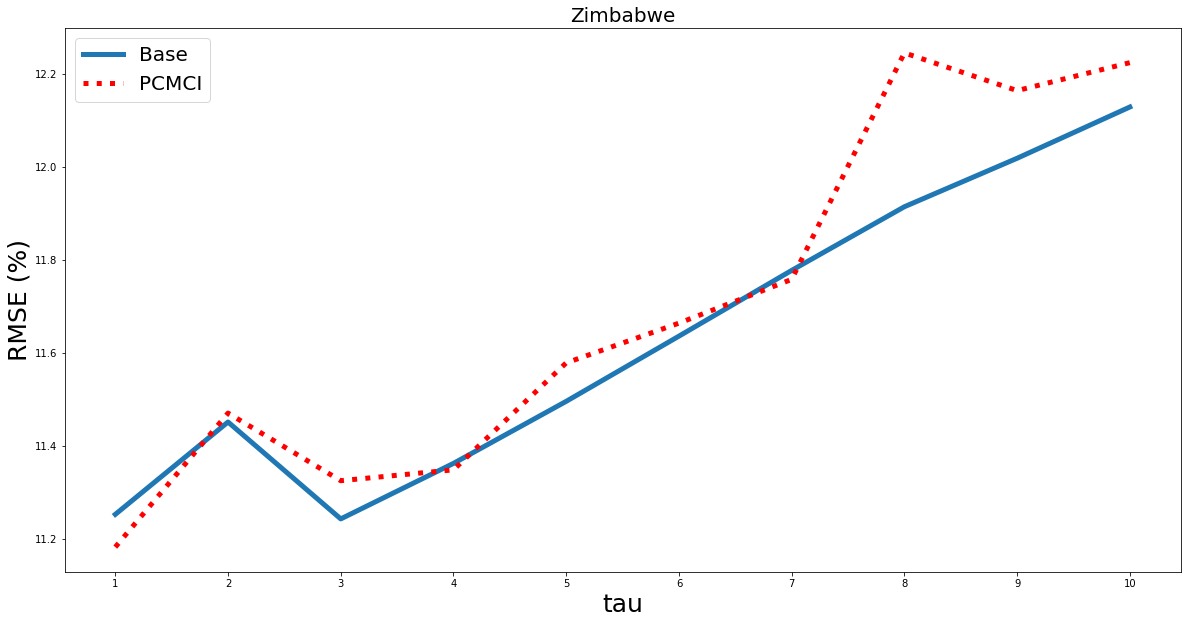

In [21]:
tau = np.arange(1,11)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
#plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color = 'green')
#plt.plot(tau, enso, label = 'ENSO', linewidth=5)
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("Zimbabwe", fontsize = 20)
#plt.savefig("./results/ZW.png")

In [87]:
f = 12
test_start = 2011
test_end = 2015
n_components_sst = 57
index = 35

In [88]:
base = []
pcmci = []
corr = []
#enso = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/ZW/pcmci_spi/base_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,index)))
    pcmci.append(np.load("../../whole_data_results/ZW/pcmci_spi/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,index)))
    corr.append(np.load("../../whole_data_results/ZW/corr_spi/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,index)))
    #enso.append(np.load("../../whole_data_results/ET_orac/enso/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))


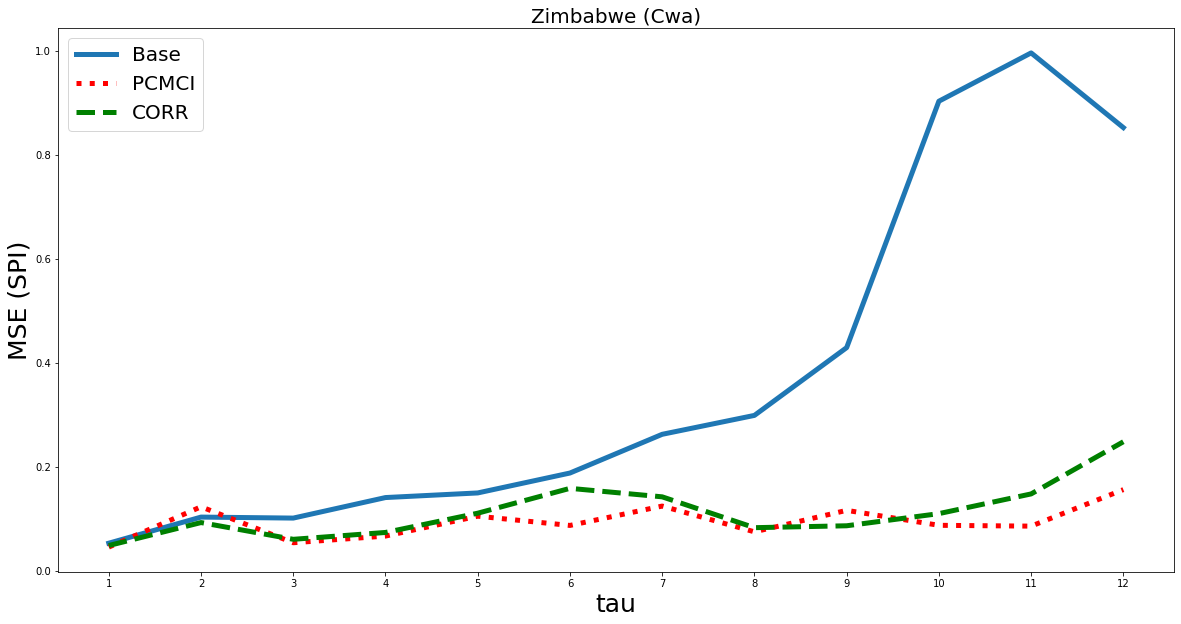

In [89]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color ='green')
#plt.plot(tau, enso, label = 'ENSO', linewidth=5)
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE (SPI)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("Zimbabwe (Cwa)", fontsize = 20)
plt.savefig("ZW_Cwa.png")

In [35]:
tau = 12
pred = np.load("../../whole_data_results/ZW/pcmci_data_spi/pred_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,index))
test = np.load("../../whole_data_results/ZW/pcmci_data_spi/test_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,index))
base = np.load("../../whole_data_results/ZW/pcmci_data_spi/pred_base_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,index))


In [51]:
test

array([-0.25387088, -0.431934  ,  0.06411877,  0.0818119 , -0.25859323,
       -0.34812971, -0.33488822, -0.34004217, -0.34521729, -0.34873583,
       -0.34641328, -0.19595356, -0.19543739,  0.01800693,  0.31065644,
        0.42494367,  0.13094788,  0.36417275,  0.34373152,  0.34319711,
        0.34126571,  0.33952163,  0.32993278,  0.16297514,  0.37813035,
        0.45534975, -0.51312221, -0.51048797, -0.36455085, -0.29142783,
       -0.28979637, -0.28987121, -0.28862781, -0.2875382 , -0.28602863,
       -0.30261269, -0.37634897])

In [52]:
pred

array([-0.32681194, -0.36782066, -0.29534782, -0.21954018, -0.18964324,
       -0.17696287, -0.20775737, -0.18472396, -0.19593168, -0.16939114,
       -0.25830739, -0.38233412, -0.52578205, -0.48171411, -0.06245667,
       -0.14229903, -0.21011358, -0.28876276, -0.2673284 , -0.28176603,
       -0.26490226, -0.20192884, -0.16904123, -0.20026128, -0.23296738,
       -0.2740182 , -0.45309962, -0.65869382, -0.67073332, -0.67759416,
       -0.67759416, -0.67759416, -0.67759416, -0.68550823, -0.67348381,
       -0.69857305, -0.73489095])

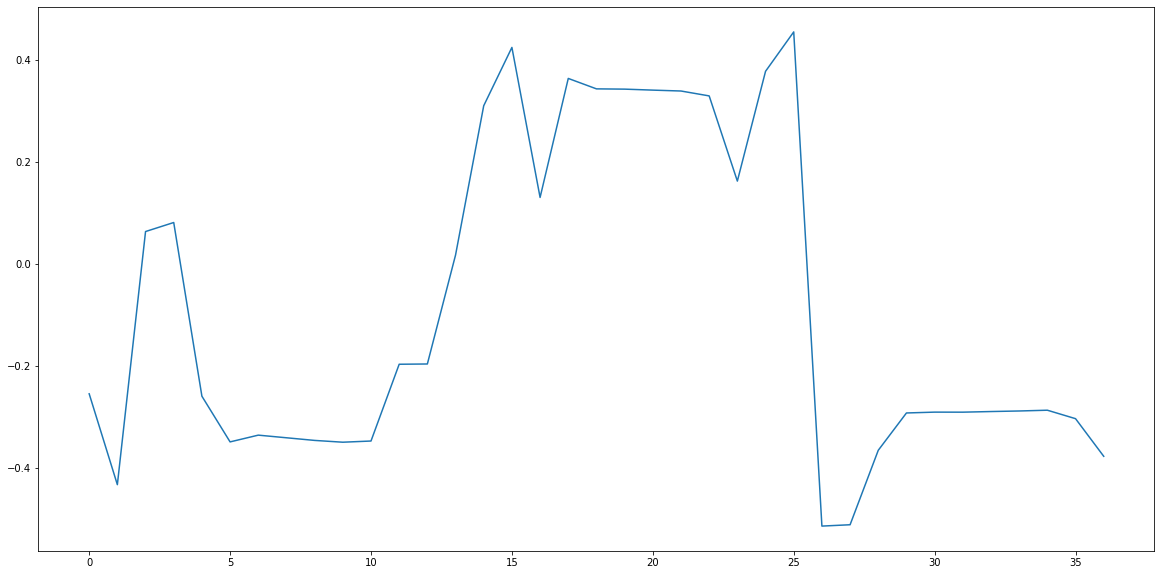

In [53]:
plt.plot(test)

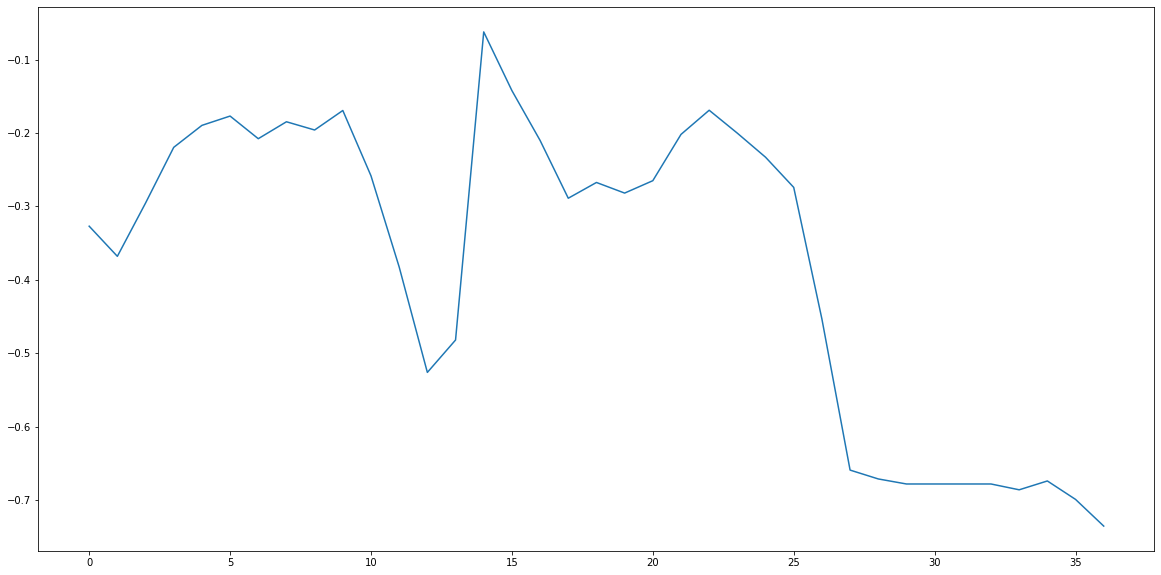

In [54]:
plt.plot(pred)

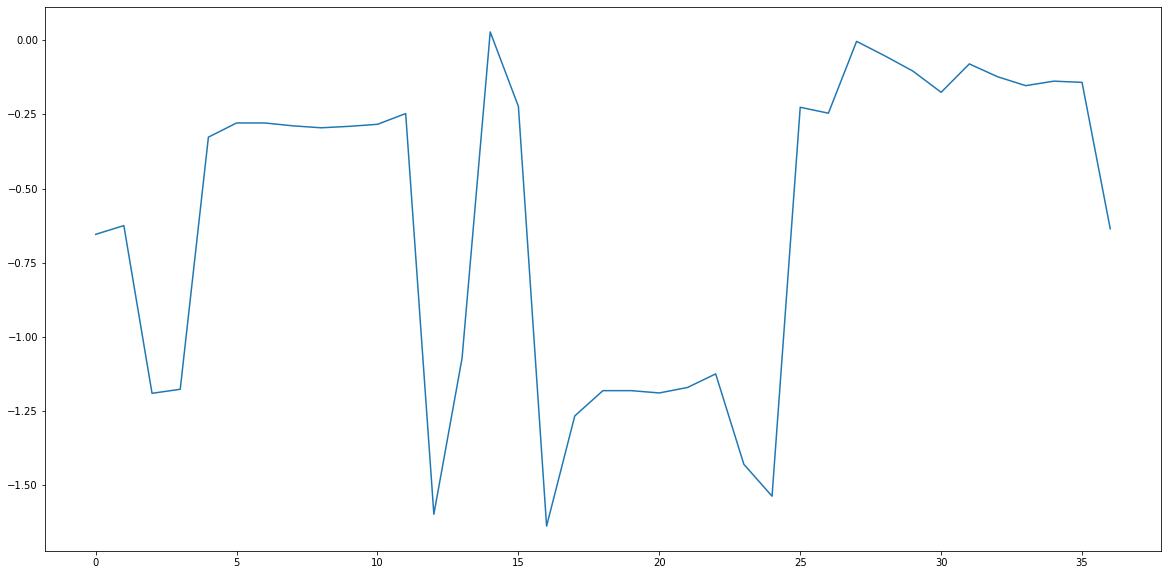

In [55]:
plt.plot(base)

In [56]:
st.pearsonr(pred,test)

(0.5319389426981872, 0.0007030085812801843)

In [57]:
st.pearsonr(base,test)

(-0.5914451506598146, 0.00011572821537924371)

# Niger

In [6]:
f = 12
test_start = 2011
test_end = 2015
n_components_sst = 57
N = 359
cc = 'NE'

In [7]:
base = []
pcmci = []
corr = []
enso = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/{}/pcmci/base_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst)))
    pcmci.append(np.load("../../whole_data_results/{}/pcmci/model_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst)))
    corr.append(np.load("../../whole_data_results/{}/corr/model_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst)))
  #  enso.append(np.load("../../whole_data_results/{}/enso/model_{}_{}_{}_{}_{}.npy".format(cc,f,test_start,test_end,tau,n_components_sst)))
    
base = np.sqrt(base)/N
pcmci = np.sqrt(pcmci)/N
corr = np.sqrt(corr)/N
#enso = np.sqrt(enso)/N

Text(0.5, 1.0, 'NIger')

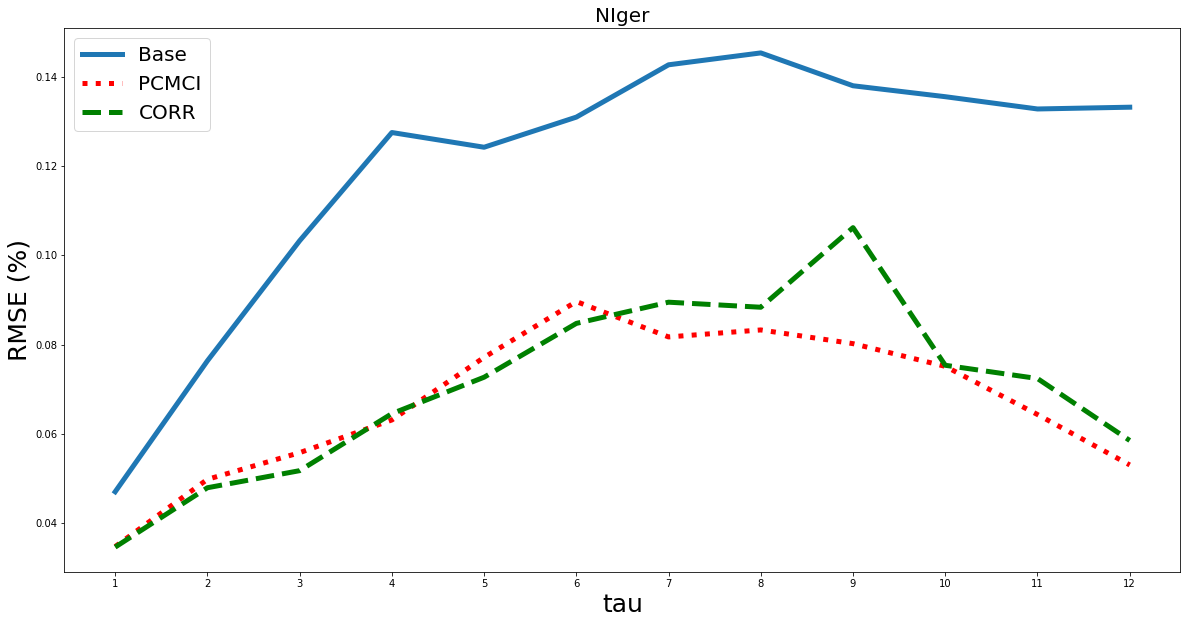

In [8]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color = 'green')
#plt.plot(tau, enso, label = 'ENSO', linewidth=5)
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("NIger", fontsize = 20)
#plt.savefig("./results/ZW.png")

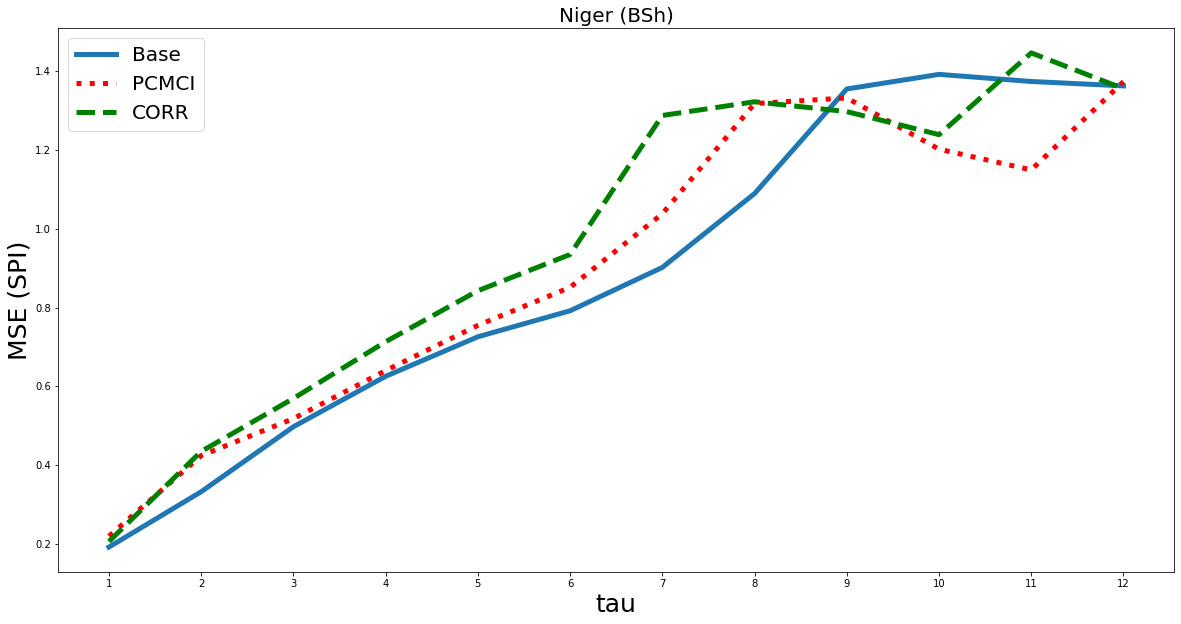

In [83]:
f = 12
test_start = 2011
test_end = 2015
n_components_sst = 57
index = 10

base = []
pcmci = []
corr = []
#enso = []
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/NE/pcmci_spi/base_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,index)))
    pcmci.append(np.load("../../whole_data_results/NE/pcmci_spi/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst,index)))
    corr.append(np.load("../../whole_data_results/NE/corr_spi/model_{}_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst, index)))
    #enso.append(np.load("../../whole_data_results/ET_orac/enso/model_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst)))


tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, pcmci, label = 'PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dashed", color ='green')
#plt.plot(tau, enso, label = 'ENSO', linewidth=5)
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE (SPI)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.title("Niger (BSh)", fontsize = 20)
plt.savefig("NE_BSh.png")